Millman\'s theorem
==================

Millman\'s theorem is a method to compute the voltage of a node in such
circuits:


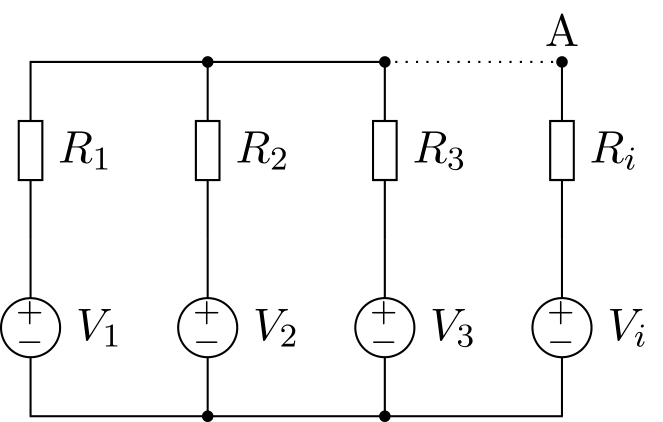

The voltage at node A is:

$$V_A = \frac{\sum \frac{V_i}{R_i}}{\sum \frac{1}{R_i}}$$

We can extend this theorem to branches with current sources:

$$V_A = \frac{\sum \frac{V_i}{R_i} + \sum I_k}{\sum \frac{1}{R_i}}$$

Note voltage sources can be null and resistances in current\'s branches
don\'t change the denominator.


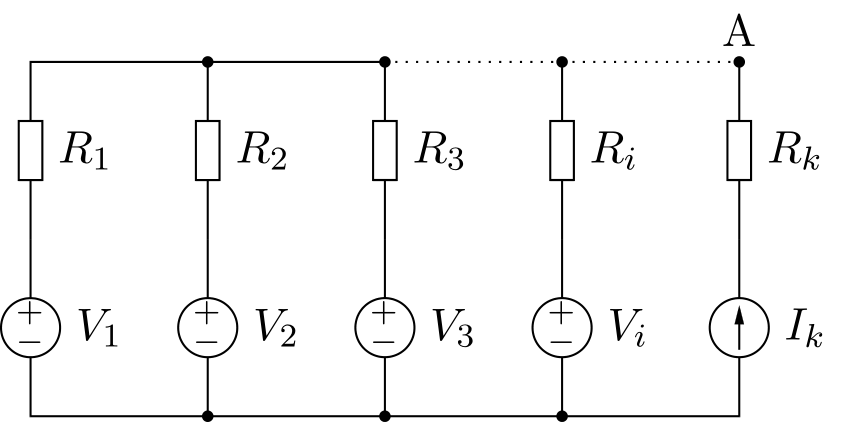

In [ ]:


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


import numpy as np


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


circuit = Circuit("Millman's theorem")

number_of_branches = 3
for i in range(1, number_of_branches +1):
    circuit.V('input%u' % i, i, circuit.gnd, i@u_V)
    circuit.R(i, i, 'A', i@u_kΩ)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

node_A = analysis.A
print('Node {}: {:5.2f} V'.format(str(node_A), float(node_A)))


Node a:  1.64 V


In [ ]:

branch_voltages = np.arange(1, number_of_branches +1)
branch_resistances = branch_voltages * float(kilo(1))
conductances = 1 / branch_resistances
voltage_A = np.sum(branch_voltages * conductances) / np.sum(conductances)
print('V(A) = {:5.2f} V'.format(voltage_A))


V(A) =  1.64 V


In [ ]:

# with current sources
for i in range(1, number_of_branches +1):
    ii = number_of_branches + i
    circuit.I('input%u' % i, circuit.gnd, ii, 100*i@u_uA)
    circuit.R(ii, ii, 'A', i@u_kΩ)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

node_A = analysis.A
print('Node {}: {:5.2f} V'.format(str(node_A), float(node_A)))


Node a:  1.96 V


In [ ]:

branch_currents = np.arange(1, number_of_branches +1) * float(micro(100))
voltage_A += np.sum(branch_currents) / np.sum(conductances)
print('V(A) = {:5.2f} V'.format(voltage_A))


V(A) =  1.96 V
